# Practical 2) Equilibrium partitioning

Aerosol particles grow and shrink under varying saturation ratios of gas phase products. Understanding how volatility relates to properties of the condensing compound and state of the aerosol particle is a huge area of research. In this practical we implement equilibrium absorptive partitioning theory and calculate the mass loading of condensed material given an initial absorptive mass. In other words, given an existing mass of particulate matter and material in the gas phase, how much particulate matter are we left with? We also practice implementing a method for finding the root of an equation in order to solve the partitioning equation. Whilst you could use an existing solver, this is to further practice converting theory to code.

<div class="alert alert-block alert-success">
<b>Objectives:</b> The objectives and exercises for today's practical are:

 - 1) [Objective 1 - Implement the equilibrium absorptive partitioning equations](#Part1)
      * [Exercise 1: Plot partitioning coefficients given an existing mass](#Exercise1)
      * [Exercise 2: Create a volatility distribution](#Exercise2)
      * [Exercise 3: Predict condensed mass from one interation of partitioning](#Exercise3)
 - 3) [Objective 2 - Calculate the equilibrium mass after partitioning of volatile material](#Part2)
      * [Exercise 4: Implement Newton-Raphson method of finding a root](#Exercise4)

Please note that you should not feel pressured to complete every exercise in class. These practicals are designed for you to take outside of class and continue working on them. Proposed solutions to all exercises can be found in the 'Solutions' folder.
</div>

<div class="alert alert-block alert-warning">
<b>Please note:</b> After reading the instructions and aims of any exercise, if some boilerplate is already provided, search the code snippets for a note that reads ------'INSERT CODE HERE'------ to identify where you need to write your code 
</div>



## Objective 1 - Implement the equilibrium absorptive partitioning equations  <a name="Part1">
    
Some implementations of gas-to-particle partitioning assume instantaneous partitioning between the condensed and gaseous phases. This has some limitations, not least because it neglects the distribution of components across a size distribution. However, in some conditions this might be a reasonable assumption to make. In any case, it can be very useful to estimate how much condensed mass might result from partitioning if a gas phase abundance and volatility of this material can be estimated. Most of the atmospheric aerosol community, for example, use the mass based equilibrium absorptive partitioning theory. This is captured in the following equations:
    
\begin{align}
C_{OA,t}^{*} = \sum_{i} C_{t,i}^{*}\varepsilon _{i}+core \label{newvbs_eq1} \\
C_{OA,c}^{*} = \sum_{i} C_{t,i}^{*}\varepsilon _{i} \label{newvbs_eq2}  \\
\varepsilon _{i}=\left ( 1+ \frac{C_{i}^{*}}{C_{OA,c}^{*}+core} \right )^{-1} \label{newvbs_eq3} \\
C_{i}^{*}=\frac{10^{6}M_{i}\gamma _{i}P_{sat,i}}{R_{gas}^{*}T}
\end{align}   
    
where we separate out the total condensed and secondary absorptive mass through the variables $C_{OA,t}^{*}$ and $C_{OA,c}^{*}$ respectively. $C_{OA,t}^{*}$ is the total condensed mass of, usually, organic aerosol given in $\mu g.m^{-3}$, $C_{t,i}^{*}$ is the gas phase abundance of compound $i$ also given in $\mu g.m^{-3}$, $\varepsilon _{i}$ the partitioning coefficient of compound $i$ and has a value between 0 and 1. $core$ is the abundance of an assumed in-volatile core. $C_{i}^{*}$ is a measure of component volatility (units $\mu g.m^{-3}$) and, as shown in the fourth equation, relates to the compound molecular weight ($M_{i}$) and activity coefficient in the condensed phase $\gamma _{i}$. In practice, unless the solution to which the compound condenses can be assumed ideal, $\gamma _{i}$ and thus $C_{i}^{*}$ changes with composition of the droplet. The ideal gas constant $R_{gas}^{*}$, with a value of  ~8.205736$10^{-5}$ is given in units of $m^{3}.atm.K^{-1}.mol^{-1}$ and the conversion factor $10^{6}$ is used to convert the molecular weight from $g.mol^{-1}$ to $\mu.g.mol^{-1}$. The pure component vapour pressure is given by $p_{i}$, where $R$ is the ideal gas constant and $T$ the temperature. 
  
The following schematic illustration visualises a hypothetical aerosol particle with an involatile core and semi-volatile condensed mass with a number of condensable products with abundances $C_{t,i}^{*}$, volatility $C_{i}^{*}$ and thus partitioning coefficients $\varepsilon _{i}$:
    
    
<img src="images/Equil_partition_schematic1.png" alt="Drawing" style="width: 400px;"/> 
    
Now we have all of the equations we need to begin our exercises.

<div class="alert alert-block alert-success">
<b> Exercise 1. Plot partitioning coefficients given an existing mass <a name="Exercise1"> </b> 
   
We have been told that partitioning coefficients that enable us to calculate  are given by the following equations:

\begin{equation}
\varepsilon _{i}=\left ( 1+ \frac{C_{i}^{*}}{C_{OA,c}^{*}+core} \right )^{-1}  \\
\end{equation}

In this exercise we are given the following information:

 - We have an existing total condensed mass of 20$\mu g.m^{-3}$
 - We assume that our volatilities, thus $C_{i}^{*}$ is defined by an array of log10 seperated values from $10^{-6}$ to $10^{3}$
 
Your task is to populate an array of $\varepsilon _{i}$ and then plot the values. You should arrive at the same figure given below:

![title <](images/Prac2_ex1.png)


In the code snippet below I have provided some boiletplate, and your task is to insert the relevant code where required. As we are using Python for these exercises, you might find the following functions useful to create an array of linearly seperated numbers and raise an array to a power:

```python
import numpy as np
# Define an array of linearly seperated values
x = np.linspace(<<start>>,<<end>>,<<number of values>>)
y = np.power(<<base>>,<<power>>)
```




[-6. -5. -4. -3. -2. -1.  0.  1.  2.  3.]
[1.e-06 1.e-05 1.e-04 1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]


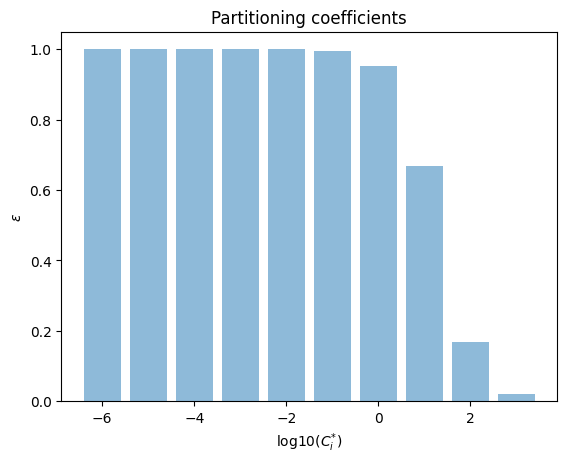

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# ------'INSERT CODE HERE'------
log_c_star = np.linspace(-6, 3, 10) # Array of log10 C* values
Cstar = 10**log_c_star # Array of C* values
# ------------------------------
print(log_c_star)
print(Cstar)

COA = 20.0 # Existing condensed mass

# ------'INSERT CODE HERE'------
epsilon =  (1+ Cstar/(COA))**(-1)# Partitioning coefficients
# ------------------------------

plt.bar(log_c_star, epsilon, align='center', alpha=0.5)
plt.ylabel(r'$\varepsilon$')
plt.xlabel(r'log10($C_{i}^{*}$)')
plt.title(r'Partitioning coefficients')
plt.show()

<div class="alert alert-block alert-success">
<b> Exercise 2. Create a volatility distribution <a name="Exercise2"> </b> 
   
In this exercise, I would like you to initialise an array which holds information on the abundance of material in each $C_{i}^{*}$ bin. This is another chance to practice some basic Python. We have been given the following information on abundance as a function of volatility.

| Log10($C_{i}^{*}$) | Abundance ($\mu g.m^{-3}$) |
|------|------|
| -6 | 0.1|
| -5 | 0.1|
| -4 | 0.15|
| -3 | 0.22|
| -2 | 0.36|
| -1 | 0.47|
| 0 | 0.58|
| 1 | 0.69|
| 2 | 0.84|
| 3 | 1.0|

Your task is to populate an array of $\varepsilon _{i}$ and then plot the values. You should arrive at the same figure given below:

![title <](images/Prac2_ex2.png)

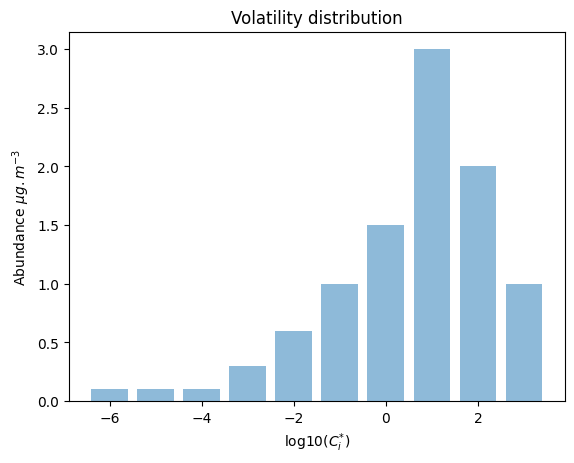

In [4]:
# Populate volatility basis set with gas phase abundance
abundance = np.zeros((10), dtype = float)

# ------'INSERT CODE HERE'------
abundance = np.array([0.1, 0.1, 0.1, 0.3, 0.6, 1, 1.5, 3, 2, 1.0])

# abundance[0] = 
# ------------------------------

plt.bar(log_c_star, abundance, align='center', alpha=0.5)
plt.ylabel(r'Abundance $\mu g.m^{-3}$')
plt.xlabel(r'log10($C_{i}^{*}$)')
plt.title(r'Volatility distribution')
plt.show()


<div class="alert alert-block alert-success">
<b> Exercise 3. Predict condensed mass from one interation of partitioning <a name="Exercise3"> </b> 
   
Now we need to implement the equation that gives as a value for our condensed mass. Just to remind ourselves, we have already met the following equations:

\begin{align}
C_{OA,t}^{*} = \sum_{i} C_{t,i}^{*}\varepsilon _{i}+core \\
C_{OA,c}^{*} = \sum_{i} C_{t,i}^{*}\varepsilon _{i}   \\
\varepsilon _{i}=\left ( 1+ \frac{C_{i}^{*}}{C_{OA,c}^{*}+core} \right )^{-1} 
\end{align}  

You have just initialised an array of compound abundance, $C_{t,i}^{*}$, and a set of 10 discrete volatility bins. You have also created a method for predicting partitioning coefficients $\varepsilon _{i}$. In this exercise I would like you to write a function that takes $C_{t,i}^{*}$, an existing core, the abundance of every compound, an initial estimate for $C_{OA,t}^{*}$ and thus calculates $\varepsilon _{i}$ and passes back a new value for $C_{OA,c}^{*}$.

Functions in Python are written as follows

```python
# Define a function 'test' that takes in variables x,y and outputs z
def test(x,y):
    
    z = x*y
    
    return z

# Initialise variables
x=3.0
y=4.0

# Call text
z = test(x,y)
```

In the code snippet below I have initilised a core mass and also the function name, but left input variables and output variables for you to finish

</div>

In [5]:
# Function to take core, gas phase abundance and predict a subsequent condensed mass
core=20.0

# ------'INSERT CODE HERE'------
def partitioning(Cstar,abundance,COA_c,core):
    # Partitioning coefficient
    epsilon = (1+Cstar/(COA_c+core))**(-1)
    # Partitionined mass
    COA_c = np.sum(epsilon*abundance)
    return COA_c
# ------------------------------

COA = partitioning(Cstar,abundance,0.0,core)
                       
print("Total secondary mass from one iteration = ", COA)
    

Total secondary mass from one iteration =  71.280315555


## Objective 2 - Calculate the equilibrium mass after partitioning of volatile material  <a name="Part2">
    
How do we use this information to arrive at a prediction for total condensed secondary mass, or $C_{OA,c}^{*}$ ? We can simply use the Newton-Raphson method by re\-formulating the equations we wish to solve. Specifically, if we have a function $f$ of a variable $x$, each iteration gives us a new estimate for $x$.

\begin{equation}
x_{1} = x_{o} - \frac{f(x_{o})}{f^{'}(x_{o})}
\end{equation}

where $f^{'}(x_{o})$ is, normally, the analytical expression for the gradient of $f$ with respect to $x$. Using the information provided above, we re-write our partitioning equation so we can use this method to find the value of $C_{OA,c}^{*}$ when $C_{OA,c}^{*} - \sum_{i} C_{t,i}^{*}\varepsilon _{i}$ is equal to zero.

\begin{align}
f(C_{OA,c}^{*}) = C_{OA,c}^{*} - \left (   \sum_{i} C_{t,i}^{*}\left ( 1+ \frac{C_{i}^{*}}{C_{OA,c}^{*}+core} \right )^{-1} \right ) \\
f^{'}(C_{OA,c}^{*})= 1 - \sum_{i} C_{t,i}^{*} \left ( 1+ \frac{C_{i}^{*}}{C_{OA,c}^{*}+core} \right  )^{-2}\frac{C_{i}^{*}}{(C_{OA,c}^{*}+core)^{2}} 
\end{align}

The following figure illustrates 3 example steps in the Newton Raphson method as we progress towards the equilibrium value for $C_{OA}$:

<img src="images/Equil_partition_schematic2.png" alt="Drawing" style="width: 500px;"/> 

In the following exercise you are asked to complete the code template provided and calculate a final secondary mass given an existing core and available mass from a specific volatility distribution.
    
This exercise is a little more involved but also serves as practice in considering appropriate code design. In the following code snippet I provide three skeleton function definitions which are used to arrive at the final value for $C_{OA}$. 

Once all functions are defined, we call the function 'Newtons_method' with our definitions of $C_{i}^{*}$, abundance, initial guess for $C_{OA,c}^{*}$ and core mass, which passes back the equilibrium value for $C_{OA,c}^{*}$ which we call 'COA_final'.

<div class="alert alert-block alert-success">
<b> Exercise 4: Implement the Newton-Raphson method of finding the equilibrium value of $C_{OA}$ <a name="Exercise4"> </b> 
    
This exercise is a little more involved but also serves as practice in considering appropriate code design. In the following code snippet I provide skeleton function definitions which are used to arrive at the final value for $C_{OA,c}^{*}$. 

Once all functions are defined, we call the function 'Newtons_method' with our definitions of $C_{i}^{*}$, abundance, initial guess for $C_{OA,c}^{*}$ and core mass, which passes back the equilibrium value for $C_{OA,c}^{*}$.

With a core mass of 5.0 $\mu g.m^{-3}$ you should arrive at a value of 2.257 $\mu g.m^{-3}$ for our total condensed secondary mass.

</div>

In [6]:
def partitioning(Cstar,abundance,COA_c,core):
    # Partitioning coefficient
    epsilon = (1+Cstar/(COA_c+core))**(-1)
    # Partitionined mass
    COA_c = np.sum(epsilon*abundance)
    return COA_c

# Implement equation 2.13
def partitioning_dash(Cstar,abundance,COA_c,core):
    epsilon =  (1+Cstar/(COA_c+core))**(-2)*Cstar/(COA_c+core)**2
    COA_dash =  np.sum(epsilon*abundance)
    return COA_dash

# Implement Newtons method
def Newtons_method(Cstar,abundance,COA_init,core):

    COA_c = partitioning(Cstar,abundance,COA_init,core)
    f =  COA_c - partitioning(Cstar,abundance,COA_c,core)
    f_dash = 1-partitioning_dash(Cstar,abundance,COA_c,core)
    COA_new = COA_c -f/f_dash 

    # Iterate estimates of COA until tolerance met
    while (abs((COA_new-COA_c)/COA_new) > 1.0e-3):

        COA_c = COA_new
        f = COA_c - (partitioning(Cstar,abundance,COA_c,core))
        f_dash = 1.0 - partitioning_dash(Cstar,abundance,COA_c,core)
        COA_new = COA_c - f/f_dash

    return COA_c
                       
# Set an initial bulk core mass and guess at condensed seconadry mass
core=5.0
COA_first_guess = 1.0
print("Core absorptive mass = ", core)

# Populate volatility basis set with gas phase abundance
abundance = np.zeros((10), dtype = float)
abundance[0] = 0.1
abundance[1] = 0.1
abundance[2] = 0.15
abundance[3] = 0.22
abundance[4] = 0.36
abundance[5] = 0.47
abundance[6] = 0.58
abundance[7] = 0.69
abundance[8] = 0.84
abundance[9] = 1.0
print("Available secondary mass = ", np.sum(abundance))

# Define array of log10 C* values
log_c_star = np.linspace(-6, 3, 10)
Cstar = np.power(10.0,log_c_star)

# Call our function 'Newtons_method'
COA_final = Newtons_method(Cstar,abundance,COA_first_guess,core)
print("Secondary mass = ", COA_final)


Core absorptive mass =  5.0
Available secondary mass =  4.51
Secondary mass =  2.257051728272925
